# Theme Model

In [1]:
import json
import numpy  as np
import pandas as pd
from glob import glob 
from tqdm import tqdm

In [2]:
df = pd.read_excel('index.xlsx')

In [3]:
df.head()

,time,author,type,title,score,filename,content
0,2018-02-01 22:50:42,ted5566,新聞,台灣央行新掌門人如何走出自己的路？,10,pttdata\M.1517496645.A.38D.json,\n1.原文連結：\n\nhttps://cn.reuters.com/article/fo...
1,2018-02-02 00:12:28,j853540,標的,大亞 空,3,pttdata\M.1517501551.A.D55.json,\n\n\n\n1. 標的：大亞\n\n2. 分類：空\n\n3. 分析/正文：\n\n最近...
2,2018-02-02 08:11:27,milk7054,新聞,蘋果本季營收預測不如預期 iPhone整體需,19,pttdata\M.1517530291.A.04E.json,\n-------------------------------發文提醒---------...
3,2018-02-02 08:25:45,kaiming7955,新聞,蘋果營收、盈餘創新高，稱愛瘋X週週奪最,14,pttdata\M.1517531147.A.7F3.json,\n\n蘋果周四於美股盤後公佈前季（10-12月）財報，雖然愛瘋出貨量不如預期，但仍舊是營收...
4,2018-02-02 08:30:04,ESunBoy,閒聊,2018/02/02 盤中閒聊,569,pttdata\M.1517531406.A.3CD.json,\nxx老師早料到台股準備封關，\n2018全面毀滅，\n你一半我一半，\n大獲全勝。\n\...


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
a=df.groupby("type").count()['time'].sort_values(ascending=False)[:7]

In [24]:
# sns.set_style("darkgrid")
sns.set_style("darkgrid",{"font.sans-serif":['Microsoft JhengHei']})


[Text(0, 0, '新聞'),
 Text(0, 0, '標的'),
 Text(0, 0, '請益'),
 Text(0, 0, '其他'),
 Text(0, 0, '心得'),
 Text(0, 0, '閒聊'),
 Text(0, 0, '投顧')]

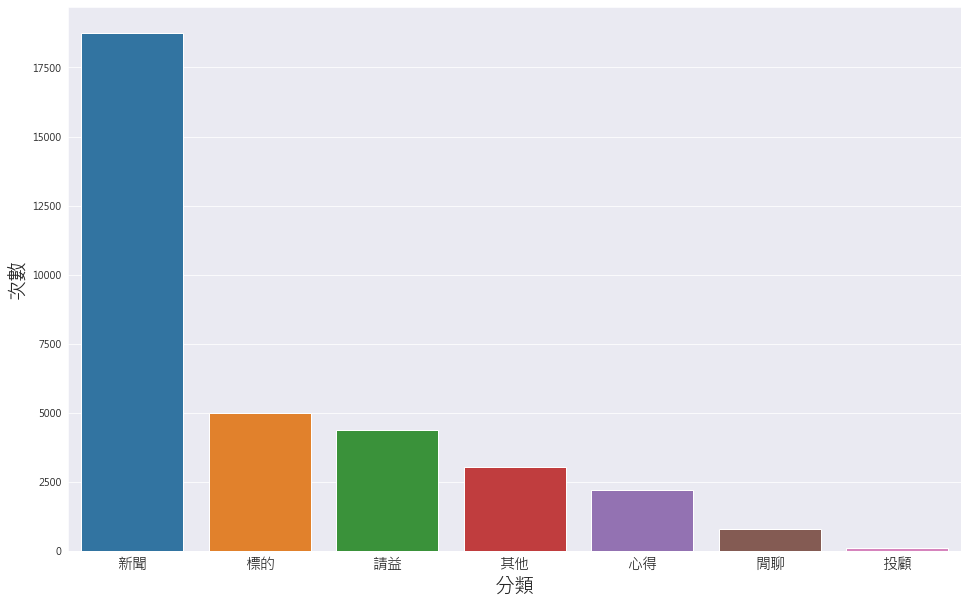

In [41]:
fig, ax = plt.subplots(figsize=(16,10))

sns.barplot(x=a.index, y=a)
ax.set_xlabel("分類",fontsize=20)
ax.set_ylabel("次數",fontsize=20)
ax.set_xticklabels(a.index, size = 15)

In [30]:
dir(ax)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_autotitlepos',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axisbelow',
 '_clipon',
 '_clippath',
 '_connected',
 '_contains',
 '_convert_dx',
 '_current_image',
 '_facecolor',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_get_axis_list',
 '_get_clipping_extent_bbox',
 '_get_lines',
 '_get_patches_for_fill',
 '_get_view',
 '_gid',
 '_gridOn',
 '_in_layout',
 '_init_axis',
 '_label',
 '_layoutbox',
 '_left_title',
 '_make_twin_axes',
 '_

# 抓KOL

In [45]:
df.groupby('author').count()['time'].sort_values()

author
spcjp            1
gameking249      1
gan              1
ganninian        1
seiryou          1
              ... 
coconing       506
Su22           535
ESunBoy        573
CLV518         805
nightwing      849
Name: time, Length: 5788, dtype: int64

In [56]:
text_rank = df.groupby('author').count()['time'].sort_values(ascending=False).head(10)
text_rank

author
nightwing     849
CLV518        805
ESunBoy       573
Su22          535
coconing      506
cjol          495
zxcvxx        462
mayingnine    386
l75cm         354
anti87        330
Name: time, dtype: int64

In [85]:
df[df['author']=='coconing']

,time,author,type,title,score,filename,content
179,2018-02-06 15:02:44,coconing,其他,107年02月06日 三大法人買賣金額統計表,111,pttdata\M.1517900566.A.0B4.json,\nhttp://www.twse.com.tw/zh/page/trading/fund/...
348,2018-02-09 15:01:28,coconing,其他,107年02月09日 三大法人買賣金額統計表,88,pttdata\M.1518159691.A.0BD.json,\nhttp://www.twse.com.tw/zh/page/trading/fund/...
454,2018-02-12 14:59:35,coconing,其他,107年02月12日 三大法人買賣金額統計表,126,pttdata\M.1518418779.A.A3D.json,\nhttp://www.twse.com.tw/zh/page/trading/fund/...
600,2018-02-21 15:01:56,coconing,其他,107年02月21日 三大法人買賣金額統計表,51,pttdata\M.1519196519.A.01F.json,\nhttp://www.twse.com.tw/zh/page/trading/fund/...
630,2018-02-22 15:01:09,coconing,其他,107年02月22日 三大法人買賣金額統計表,29,pttdata\M.1519282873.A.BEE.json,\nhttp://www.twse.com.tw/zh/page/trading/fund/...
...,...,...,...,...,...,...,...
33826,2020-04-22 15:05:34,coconing,其他,109年04月22日 三大法人買賣金額統計表,152,pttdata\M.1587539137.A.216.json,\nhttp://www.twse.com.tw/zh/page/trading/fund/...
34060,2020-04-27 15:02:59,coconing,其他,109年04月27日 三大法人買賣金額統計表,176,pttdata\M.1587970981.A.4FE.json,\nhttp://www.twse.com.tw/zh/page/trading/fund/...
34099,2020-04-28 15:06:38,coconing,其他,109年04月28日 三大法人買賣金額統計表,93,pttdata\M.1588057621.A.37D.json,\nhttp://www.twse.com.tw/zh/page/trading/fund/...
34177,2020-04-29 14:59:03,coconing,其他,109年04月29日 三大法人買賣金額統計表,115,pttdata\M.1588143546.A.3A4.json,\nhttp://www.twse.com.tw/zh/page/trading/fund/...


In [55]:
df[df['score']>30].groupby('author').count()['time'].sort_values(ascending=False).head(10)

author
coconing       460
vendan5566     264
nightwing      217
hito21         165
justforsing    149
CLV518         121
tim0259        120
EDFR           113
ESunBoy        111
zesonpso       100
Name: time, dtype: int64

In [87]:
df[df['author']=='vendan5566']

,time,author,type,title,score,filename,content
436,2018-02-12 08:30:37,vendan5566,閒聊,2018/02/12 盤中閒聊,625,pttdata\M.1518395440.A.F2A.json,\n紅包 or me\n\n ◢███◣ ◢▄▄▄▄▄◣\n ＞ ＜ ▄▄▄▄▄▄...
493,2018-02-14 08:30:26,vendan5566,閒聊,2018/02/14 盤中閒聊,207,pttdata\M.1518568229.A.F53.json,\n新年快樂！\n祝大家都有很多錢可以包！\n情人節快樂！\n祝大家都有小辣椒可以抱！\n\...
589,2018-02-21 08:30:03,vendan5566,閒聊,2018/02/21 盤中閒聊,587,pttdata\M.1519173005.A.F0D.json,\n歡天喜地狗年第一盤\n\n人人賺錢賺到翻\n\n--\n
627,2018-02-22 14:00:53,vendan5566,閒聊,2018/02/22 盤後閒聊,215,pttdata\M.1519279255.A.8A7.json,\n又下雨\n\n睡公園的各位注意保暖了\n\n--\n
653,2018-02-23 08:30:03,vendan5566,閒聊,2018/02/23 盤中閒聊,577,pttdata\M.1519345805.A.31B.json,\n你說你有點難追 想讓我知難而退\n身家馬上就變現 只等綠葉變紅葉\n喊著數錢的機會 不害...
...,...,...,...,...,...,...,...
32284,2020-03-27 13:39:43,vendan5566,心得,早知道今天是這樣，我就,39,pttdata\M.1585287585.A.074.json,\n看大家多少都還是出現了早知道的心態\n\n早知道我就開盤尾盤補\n\n早知道我反彈就出光...
32877,2020-04-06 09:51:17,vendan5566,新聞,科技大廠第一家！鴻海宣布警報景點員工在,34,pttdata\M.1586137879.A.66B.json,\n\n1.原文連結：\nhttps://tw.appledaily.com/propert...
32984,2020-04-07 20:56:36,vendan5566,參選,vendan5566,138,pttdata\M.1586264198.A.862.json,\n參選人：vendan5566\n\n1.上站次數：1118次\n\n2.發表文章篇數:《...
33149,2020-04-10 10:38:43,vendan5566,新聞,中環3/24～4/9處分台灣高鐵股票虧損829,31,pttdata\M.1586486325.A.5FE.json,\n1.原文連結：\nhttps://reurl.cc/R4Xmax\n\n2.原文內容：\...


In [72]:
text_rank = df[df['type'] != '新聞'][df['type'] !='其他'].groupby('author').count()['time'].sort_values(ascending=False).head(10)
text_rank

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


author
vendan5566     264
hito21         175
justforsing    137
hrma           128
tim0259        114
epson5566      102
j2708180       100
zesonpso        90
Ejaculation     76
zakijudelo      61
Name: time, dtype: int64

In [93]:
df[df['author']=='hito21']

,time,author,type,title,score,filename,content
8104,2018-08-27 11:15:17,hito21,標的,元大滬深300正2,44,pttdata\M.1535339720.A.B5C.json,\n--------------------------------------------...
9278,2018-09-21 23:25:44,hito21,標的,長榮航,24,pttdata\M.1537543547.A.439.json,\n--------------------------------------------...
10252,2018-10-11 23:26:30,hito21,標的,元大黃金S&P正2,3,pttdata\M.1539271593.A.E72.json,\n1. 標的：元大S&P黃金 正2\n\n2. 分類：多/空/請益/心得\n\n短多 不宜...
10515,2018-10-17 16:37:56,hito21,標的,00672L 元大S&P原油正2,8,pttdata\M.1539765479.A.FE0.json,\n先損出 趨勢轉太大...還有低點可接~感恩...\n不空等低點接回 台股大戶有套到所以%...
10997,2018-10-26 13:23:53,hito21,標的,00669R+00671R 美國反1,4,pttdata\M.1540531436.A.6A2.json,\n獲利達標出場~感謝...\n\n1. 標的：00671R+00669R\n\n2. 分類...
...,...,...,...,...,...,...,...
27593,2020-01-23 22:49:03,hito21,標的,道瓊03(UDH0) 月刊~,69,pttdata\M.1579790945.A.3A8.json,\n1. 標的：道瓊03(UDH0) or 美國道瓊指數~\n\n2. 分類：多/空/請益/...
28790,2020-02-26 19:04:01,hito21,標的,道瓊03(UDH0) 月報~,106,pttdata\M.1582715043.A.F0E.json,\n1. 標的：道瓊03(UDH0) 月報 or 美國道瓊指數~\n\n2. 分類：多/空/...
31885,2020-03-23 22:59:55,hito21,標的,微型小道瓊06,51,pttdata\M.1584975599.A.E0D.json,\n1. 標的：微型小道瓊06\n\n2. 分類：多/空/請益/心得\n請益 用來分享美國D...
32527,2020-03-30 10:25:00,hito21,標的,00637L 元大滬深300正2,13,pttdata\M.1585535102.A.5A7.json,\n1. 標的：00637L 元大滬深300正2\n\n2. 分類：多/空/請益/心得\n短...


In [94]:
df[df['author']=='hito21'].groupby('type').count()

,time,author,title,score,filename,content
type,,,,,,
標的,174,174,174,174,174,174
標的 美國道瓊(*UDU9),1,1,0,1,1,1


# 日期熱度

In [102]:
df['time'] = pd.to_datetime(df['time'] )

In [105]:
df['time'][0].date()

datetime.date(2018, 2, 1)

In [106]:
df['date'] = df['time'].apply(lambda x:x.date())

In [110]:
time = df.groupby('date').count()
time

,time,author,type,title,score,filename,content
date,,,,,,,
2018-02-01,1,1,1,1,1,1,1
2018-02-02,45,45,45,45,45,45,45
2018-02-03,25,25,25,25,25,25,25
2018-02-04,14,14,14,14,14,14,14
2018-02-05,42,42,42,42,42,42,42
...,...,...,...,...,...,...,...
2020-04-27,42,42,42,42,42,42,42
2020-04-28,59,59,59,59,59,59,59
2020-04-29,92,92,92,92,92,92,92


Text(0.5, 1.0, '每日文章筆數')

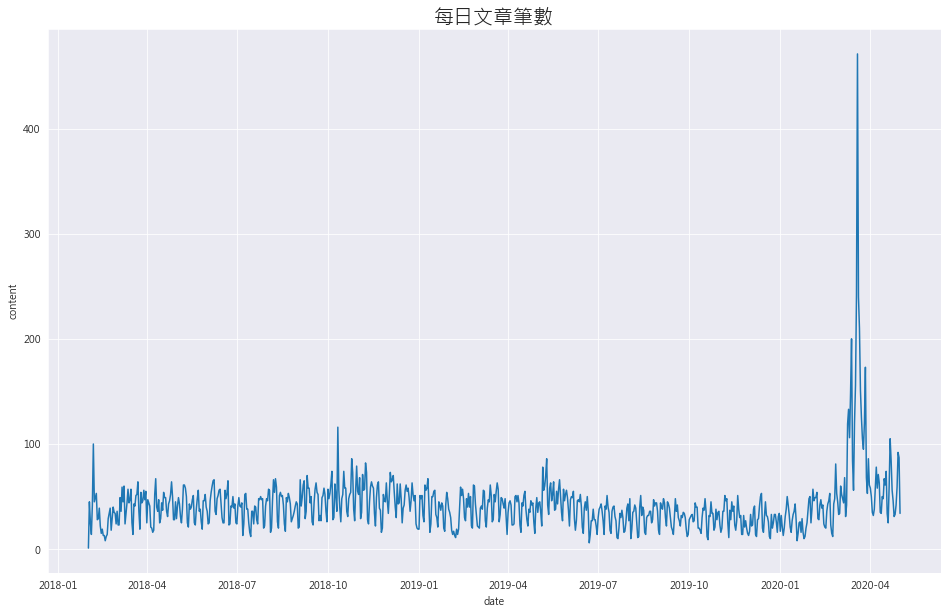

In [117]:
fig, ax = plt.subplots(figsize=(16,10))
sns.lineplot(x=time.index, y=time['content'])
ax.set_title("每日文章筆數", fontsize=20)

In [120]:
se = time['time']

In [121]:
se.describe()

count    821.000000
mean      41.844093
std       27.711054
min        1.000000
25%       27.000000
50%       39.000000
75%       50.000000
max      471.000000
Name: time, dtype: float64

# 移除網址

In [4]:
import re

In [5]:
df.content[0]

'\n1.原文連結：\n\nhttps://cn.reuters.com/article/focus-taiwan-cen-new-head-yang-0201-idCNKBS1FL4CJ\nhttps://goo.gl/ySBGs4\n\n2.原文內容：\n\n台湾央行正式进入后彭时代 新掌门人如何走出自己的路？\n\n路透台北2月1日 - 20年前台灣桃園大園一場嚴重空難，儘管讓台灣央行人才嚴重折損，\n卻也意外造就了彭淮南和楊金龍兩位從央行基層一路做到總裁。\n\n然而，鮮少人知道，當年擔任央行行務委員的楊金龍，原本也在出席印尼巴里島「東南亞\n國家中央銀行總裁聯合會」(SEACEN)名單中，卻因時任央行總裁的許遠東「大筆一揮」，\n臨時改由他人出席，此事一度讓楊金龍相當沮喪。\n\n知情人士稱，當年，台灣剛歷經1997年亞洲金融風暴，1998年初許遠東為慰勞官員的辛勞\n，特以出席SEACEN年會的名義，安排多位一級主委一起赴巴里島。但在回程時卻遭遇重大\n空難。\n\n突然其來的空難，央行頓時群龍無首，當時總統李登輝隨即任命當時擔任中國商銀(現今\n的兆豐商銀)董事長彭淮南接掌總裁職務，彭淮南也因此提早數月當上央行總裁。彭淮南\n迄今依舊對李登輝心存感激，也因此，每當央行內部有任何活動，央行合唱團都特別為他\n獻一首「感恩的心」。\n\n彭淮南接掌央行後，深受彭信賴的楊金龍從此官運亨通，而這次之所以能順利出線擔任央\n行總裁一職，也是彭淮南向總統蔡英文強力推薦的結果。\n\n面對此前連續兩任央行總裁都在任期過世，向來篤信一貫道的彭淮南，在接掌總裁後隨即\n找來高人為央行修「風水」，希望能永保平安。也因此，如今走進綠意盎然、鳥言花香的\n央行，舉凡一草一木，處處都看得到「風水」的痕跡。\n\n例如，央行舊大樓的正前方，總共種了八大一小不同品的樹種；其中，位居中間的榕樹，\n個頭雖小卻是價值不斐，知情人士稱，該榕樹代表的是央行「主事者」，而兩旁的「小葉\n欖仁」等樹木則是象徵央行主要局處。\n\n而對於各種「沖煞」，央行也修了一對「石獅父子」及一座小水池，並規定所有停放在央\n行停車場的車子，車頭必須一致對外。\n\n另央行為方便內部往來，在新舊大樓間興建一座「風雨走廊」，然後興建後果真是「風雨\n」不斷；特別是該走廊直通舊大樓二樓的外匯局首當其衝，迫使央行不

In [6]:
corpus = [re.sub('(https|http)[az]*[:.]+\S+',"", i) for i in df.content]

In [7]:
corpus[0]

'\n1.原文連結：\n\n\n\n\n2.原文內容：\n\n台湾央行正式进入后彭时代 新掌门人如何走出自己的路？\n\n路透台北2月1日 - 20年前台灣桃園大園一場嚴重空難，儘管讓台灣央行人才嚴重折損，\n卻也意外造就了彭淮南和楊金龍兩位從央行基層一路做到總裁。\n\n然而，鮮少人知道，當年擔任央行行務委員的楊金龍，原本也在出席印尼巴里島「東南亞\n國家中央銀行總裁聯合會」(SEACEN)名單中，卻因時任央行總裁的許遠東「大筆一揮」，\n臨時改由他人出席，此事一度讓楊金龍相當沮喪。\n\n知情人士稱，當年，台灣剛歷經1997年亞洲金融風暴，1998年初許遠東為慰勞官員的辛勞\n，特以出席SEACEN年會的名義，安排多位一級主委一起赴巴里島。但在回程時卻遭遇重大\n空難。\n\n突然其來的空難，央行頓時群龍無首，當時總統李登輝隨即任命當時擔任中國商銀(現今\n的兆豐商銀)董事長彭淮南接掌總裁職務，彭淮南也因此提早數月當上央行總裁。彭淮南\n迄今依舊對李登輝心存感激，也因此，每當央行內部有任何活動，央行合唱團都特別為他\n獻一首「感恩的心」。\n\n彭淮南接掌央行後，深受彭信賴的楊金龍從此官運亨通，而這次之所以能順利出線擔任央\n行總裁一職，也是彭淮南向總統蔡英文強力推薦的結果。\n\n面對此前連續兩任央行總裁都在任期過世，向來篤信一貫道的彭淮南，在接掌總裁後隨即\n找來高人為央行修「風水」，希望能永保平安。也因此，如今走進綠意盎然、鳥言花香的\n央行，舉凡一草一木，處處都看得到「風水」的痕跡。\n\n例如，央行舊大樓的正前方，總共種了八大一小不同品的樹種；其中，位居中間的榕樹，\n個頭雖小卻是價值不斐，知情人士稱，該榕樹代表的是央行「主事者」，而兩旁的「小葉\n欖仁」等樹木則是象徵央行主要局處。\n\n而對於各種「沖煞」，央行也修了一對「石獅父子」及一座小水池，並規定所有停放在央\n行停車場的車子，車頭必須一致對外。\n\n另央行為方便內部往來，在新舊大樓間興建一座「風雨走廊」，然後興建後果真是「風雨\n」不斷；特別是該走廊直通舊大樓二樓的外匯局首當其衝，迫使央行不得不變相「關閉」\n風水走廊，期能阻擋由新大樓直接摜穿到外匯局的「煞氣」。\n\n彭淮南在大修央行風水後，央行的確平平安安度了20個年頭。同樣的，在彭淮南強勢領導\n下，台灣不論是金融業或央行雙率也變得

# 斷詞

In [8]:
# dir(df.content[1])

In [9]:
from ckiptagger import data_utils, construct_dictionary, WS, POS, NER
ws = WS("./data")
pos = POS("./data")
ner = NER("./data")

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passi


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [10]:
word_sentence_list = ws(
    corpus,
    sentence_segmentation = True, # To consider delimiters
    segment_delimiter_set = {",", "。", ":", "?", "!", ";","\n"} # This is the defualt set of delimiters
    # recommend_dictionary = dictionary1, # words in this dictionary are encouraged
#     coerce_dictionary = dictionary2 # words in this dictionary are forced
)


KeyboardInterrupt: 

In [11]:
# word_sentence_list

# 停用詞

In [12]:
stopWords=[]
with open('stopword.txt', 'r', encoding='UTF-8') as file:
    for data in file.readlines():
        data = data.strip()
        stopWords.append(data)

In [13]:
# for i in stopWords[0:50]:
#     print(i)

In [14]:
# r"\n" in stopWords

In [15]:
remainder_sentence = []
for i in word_sentence_list:
    remainderWords = list(filter(lambda a: a not in stopWords and a != '\n', i))
    remainder_sentence.append(remainderWords)


In [16]:
# remainder_sentence

# Word Cloud

In [35]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import seaborn as sns
from wordcloud import WordCloud

myfont=FontProperties(fname=r'msfont.ttf',size=14)
sns.set_style("whitegrid",{"font.sans-serif":['Microsoft JhengHei']})

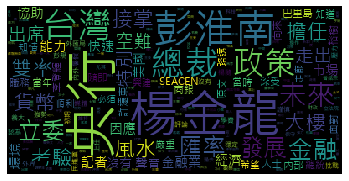

In [38]:
wl_space_split = " ".join(remainder_sentence[0])
my_wordcloud = WordCloud(font_path =r'msfont.ttf').generate(wl_space_split)
plt.imshow(my_wordcloud)
plt.axis("off")
plt.show()

# LDA

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
%matplotlib inline

In [20]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

In [21]:
# remainder_sentence

In [22]:
from gensim import corpora, models

In [23]:
dictionary_LDA = corpora.Dictionary(remainder_sentence)

In [24]:
# dictionary_LDA

In [25]:
dictionary_LDA.filter_extremes(no_below=5)

In [26]:
corpus = [dictionary_LDA.doc2bow(list_of_tokens) for list_of_tokens in remainder_sentence]

In [27]:
# corpus

In [28]:
num_topics = 20
%time lda_model = models.LdaModel(corpus, num_topics=num_topics, \
                                  id2word=dictionary_LDA, \
                                  passes=4, alpha=[0.01]*num_topics, \
                                  eta=[0.01]*len(dictionary_LDA.keys()))

Wall time: 22.2 s


In [29]:
for i,topic in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=10):
    print(str(i)+": "+ topic)
    print()

0: 0.018*":" + 0.008*"年" + 0.008*"台灣" + 0.006*"公司" + 0.005*"投資" + 0.005*"集團" + 0.005*"市場" + 0.005*"中鋼" + 0.005*"鴻海" + 0.004*"技術"

1: 0.027*":" + 0.018*"元" + 0.013*"年" + 0.010*"營收" + 0.008*"季" + 0.008*"     " + 0.008*"去年" + 0.007*"2018" + 0.007*"月" + 0.006*"編輯"

2: 0.038*"元" + 0.030*"股" + 0.024*"    " + 0.020*"現金" + 0.020*"盈餘" + 0.019*"　" + 0.017*"公積" + 0.016*"股利" + 0.014*"配股" + 0.013*"0
"

3: 0.010*"發文" + 0.009*"會" + 0.008*"點" + 0.008*"次" + 0.008*"指數" + 0.007*"市場" + 0.007*"請" + 0.007*"規範" + 0.007*"處份" + 0.007*"交易"

4: 0.101*"    " + 0.101*"機率" + 0.099*"PERCENTRANK " + 0.096*"上漲" + 0.096*"單" + 0.095*"跌破" + 0.091*"       " + 0.089*"出場
" + 0.009*"        " + 0.008*"出場"

5: 0.010*"產品" + 0.010*"年" + 0.009*"蘋果" + 0.008*"技術" + 0.008*"今年" + 0.008*"手機" + 0.008*"晶片" + 0.007*"公司" + 0.007*"原文" + 0.007*"會"

6: 0.054*"   " + 0.021*"  " + 0.008*"     " + 0.006*"鴻海" + 0.006*"元" + 0.006*"原文" + 0.005*"發文" + 0.005*"內容" + 0.005*"    " + 0.005*"會"

7: 0.048*":" + 0.014*"2018" + 0.014*"編輯" + 0.013*"※ " + 0.

In [30]:
# lda_model[corpus[0]]

In [31]:
%matplotlib inline
import pyLDAvis
import pyLDAvis.gensim

vis = pyLDAvis.gensim.prepare(topic_model=lda_model, corpus=corpus, dictionary=dictionary_LDA, mds='mmds')
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

In [32]:
# def default(self, obj):
#     if isinstance(obj, (numpy.int_, numpy.intc, numpy.intp, numpy.int8,
#         numpy.int16, numpy.int32, numpy.int64, numpy.uint8,
#         numpy.uint16,numpy.uint32, numpy.uint64)):
#         return int(obj)
#     elif isinstance(obj, (numpy.float_, numpy.float16, numpy.float32, 
#         numpy.float64)):
#         return float(obj)
#     elif isinstance(obj, (numpy.ndarray,)): # add this line
#         return obj.tolist() # add this line
#     return json.JSONEncoder.default(self, obj)


In [33]:
# number_topics = 5
# number_words = 10

In [34]:
# lda = LDA(n_components=number_topics, n_jobs=-1)
# # lda.fit(remainder_sentence)

# 找Y